### Part A

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   education-num   48842 non-null  int64 
 2   capital-gain    48842 non-null  int64 
 3   capital-loss    48842 non-null  int64 
 4   hours-per-week  48842 non-null  int64 
 5   class           48842 non-null  object
dtypes: int64(5), object(1)
memory usage: 2.2+ MB
Accuracy (RBF SVM): 82.99%
Precision (RBF SVM): 77.50%
Recall (RBF SVM): 38.65%
F1 Score (RBF SVM): 51.57%
Prediction for Individual 1:  <=50k
Prediction for Individual 2:  <=50k


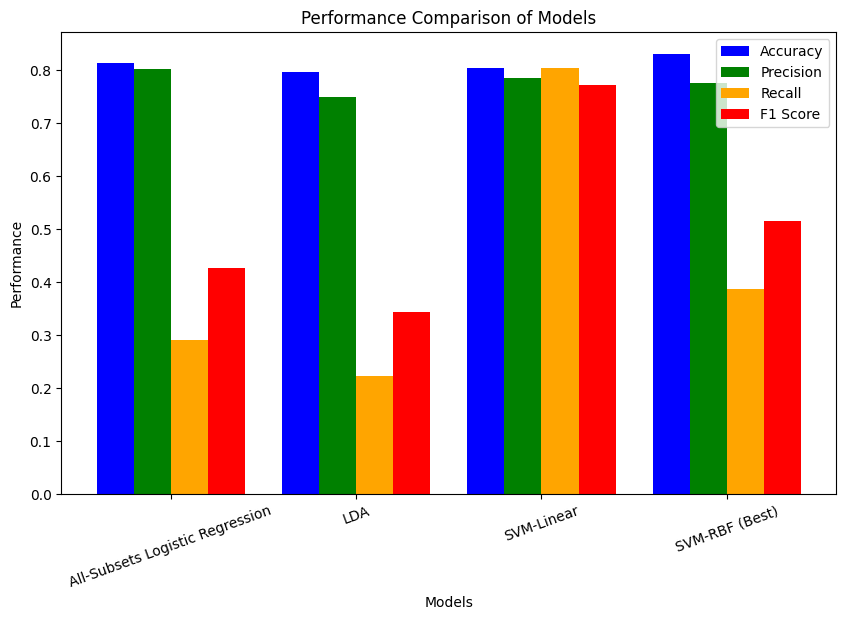

In [ ]:
# Part A
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

census = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/adult-census-numeric-all.csv", na_values=['NA'])
census.info()
census.head()

X_rbf_svm = census[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
y_rbf_svm = census['class']

# Split the data
X_rbf_svm_train, X_rbf_svm_test, y_rbf_svm_train, y_rbf_svm_test = train_test_split(X_rbf_svm, y_rbf_svm, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_rbf_svm_train_scaled = scaler.fit_transform(X_rbf_svm_train)
X_rbf_svm_test_scaled = scaler.transform(X_rbf_svm_test)

# Create an RBF kernel SVM model
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')

# Train the model
rbf_svm.fit(X_rbf_svm_train_scaled, y_rbf_svm_train)

# Make predictions on test set
y_rbf_svm_pred = rbf_svm.predict(X_rbf_svm_test_scaled)

# Calculate performance metrics
accuracy_rbf = accuracy_score(y_rbf_svm_test, y_rbf_svm_pred)
print(f"Accuracy (RBF SVM): {accuracy_rbf * 100:.2f}%")
precision_rbf = precision_score(y_rbf_svm_test, y_rbf_svm_pred, pos_label=' >50K', zero_division=1)
print(f"Precision (RBF SVM): {precision_rbf * 100:.2f}%")
recall_rbf = recall_score(y_rbf_svm_test, y_rbf_svm_pred, pos_label=' >50K')
print(f"Recall (RBF SVM): {recall_rbf * 100:.2f}%")
f1_rbf = f1_score(y_rbf_svm_test, y_rbf_svm_pred, pos_label=' >50K')
print(f"F1 Score (RBF SVM): {f1_rbf * 100:.2f}%")

# Define the new individuals' data
new_individuals = pd.DataFrame({
    'age': [39, 45],
    'education-num': [10, 14],
    'capital-gain': [0, 2000],
    'capital-loss': [0, 0],
    'hours-per-week': [40, 35]
})

# Standardize using the trained scaler
new_individuals_scaled = scaler.transform(new_individuals)

# Make predictions for the new individuals
predictions = rbf_svm.predict(new_individuals_scaled)

# Display results
for i, pred in enumerate(predictions):
    print(f"Prediction for Individual {i + 1}: {' >50k' if pred == ' >50k' else ' <=50k'}")



# Visualization
import matplotlib.pyplot as plt

# Model names
models = ["All-Subsets Logistic Regression", "LDA", "SVM-Linear", "SVM-RBF (Best)"]

# Perforance metrics from each model (values taken from previous results)
accuracy = [0.8132, 0.7962, 0.8034, 0.8299]
precision = [0.8026, 0.7498, 0.7858, 0.7750]
recall = [0.2909, 0.2224, 0.8034, 0.3865]
f1_score = [0.4269, 0.3430, 0.7727, 0.5157]

# Bar Width
bar_width = 0.2
x1 = np.arange(len(models))

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x1 - 1.5*bar_width, accuracy, bar_width, label='Accuracy', color='blue')
ax.bar(x1 - 0.5*bar_width, precision, bar_width, label='Precision', color='green')
ax.bar(x1 + 0.5*bar_width, recall, bar_width, label='Recall', color='orange')
ax.bar(x1 + 1.5*bar_width, f1_score, bar_width, label='F1 Score', color='red')

# Labels and formatting
ax.set_xlabel('Models')
ax.set_ylabel('Performance')
ax.set_title('Performance Comparison of Models')
ax.set_xticks(x1)
ax.set_xticklabels(models, rotation=20)
ax.legend()

plt.show()

1. The dataset we've analyzed comes from the U.S. Census. It contains information on individuals including age, years of education experience, capital gains, capital losses, and hours worked per week. All of this information can help predict whether a person earns more than $50,000 per year. By using Support Vector Machines (SVM), we aimed to identify patterns and make accurate predictions on income based on the features. The model has been trained and tested on the data, making it able to classify individuals based on the probability of earning above or below the amount.

2. The All-Subsets Logistic Regression model performed well in terms of accuracy (81.32%) and precision (80.26%), but its recall (29.09%) was low, indicating that it struggled to identify positive cases. The LDA model had a slightly lower accuracy (79.62%) and an even lower recall (22.24%), showing it was not as effective at identifying individuals who earn more than $50k. The SVM-Linear model had a solid balance achieving relatively a good accuracy (80.34%), with the highest recall (80.34%) and a solid F1 score (77.27%), making it a competitive option to the SVM-RBf. However, SVM-RBF outperformed the others with the highest accuracy (82.99%), a strong precision (77.50%), and an improved F1 score (51.57%). Although, its recall (38.65%) was lower than SVM-Linear, its combination of accuracy, precision, and overall performance makes it the most useful model for predictions for the dataset.

3. The bar plot compares the performance of four models: All-Subsets Logistic Regression, LDA, SVM-Linear, and the best performing SVM-RBF.


*   Accuracy (blue) is highest for SVM-RBF, followed closely by Logistic Regression and SVM-Linear.
*   Precision (green) is fairly high across all models, with SVM-Linear performing the best.
*   Recall (orange) is where the models differ significantly. SVM-Linear has the highest recall, while LDA and Logistic Regression lag behind.
*   F1 Score (red) balances precision and recall, showing that SVM-Linear and SVM-RBF are the strongest contenders.

4. I would suggest the SVM-RBF (Support Vector Machine with RBF kernel) model to the organization for prediction because it has the best balance of accuracy, precision, and it contributes to overall reliability in classification. With an accuracy of 82.99%, it outperforms all other models in correctly classifying individuals . Its precision of 77.50% makes it so that when the model predicts someone earns more than $50k, it is correct most of the time, reducing false positives. While its recall (39.65%) is lower than other models, meaning it misses some high-income earners, the trade-off is that it reduces incorrect high-income classifications, which can be important in applications like decision-making in finance. Also, SVM-RBF is great at capturing non-linear and complex relationships in the data, making it more adaptable and more able to adjust to real-world situatoins compared to more simpler linear models. Given its superior overall performance and adaptability, SVM-RBF is the most reliable model for making accurte income predictions in the dataset.

5. An individual who is 39 years old, with 10 years of education, 0 capital gains, 0 capital losses, and works 40 hours per week is predicted to make less than or equal to fifty thousand dollars. An individual who is 45 years old, with 14 years of education, 2000 capital gains, 0 capital losses, and works 35 hours per week is predicted to also make less than or equal to fifty thousand dollars.





# Part C

Dataset Preview:
   Unnamed: 0  Damaged  Temp  Pressure.psi  Order
0           2        0    66            50      1
1           3        0    66            50      1
2           4        0    66            50      1
3           5        0    66            50      1
4           6        0    66            50      1

Missing Values:
Unnamed: 0      0
Damaged         0
Temp            0
Pressure.psi    0
Order           0
dtype: int64

Target Variable Distribution:
Damage
0    129
1      9
Name: count, dtype: int64

Predicted Probabilities:
Temperature: 50°F, Probability of O-ring Damage: 0.2986
Temperature: 40°F, Probability of O-ring Damage: 0.5484
Temperature: 30°F, Probability of O-ring Damage: 0.7760


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


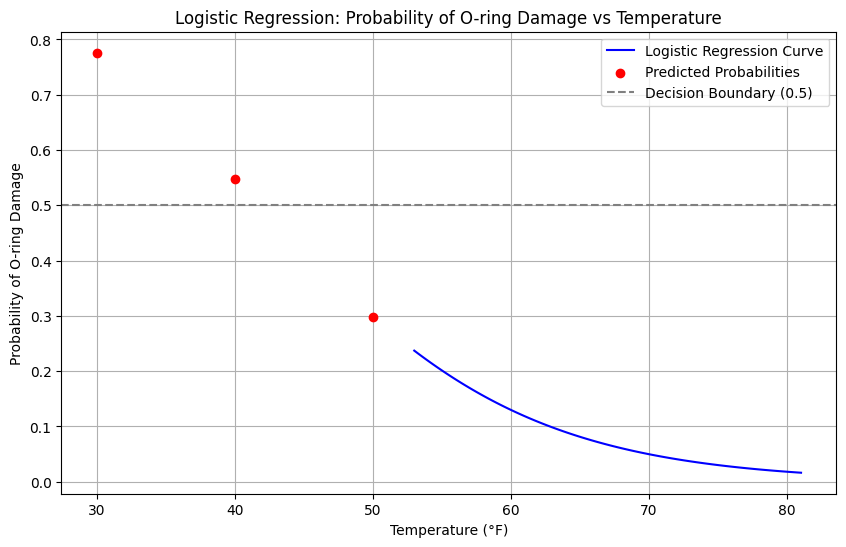


Summary:
The logistic regression model predicts the probability of O-ring damage based on air temperature.
The predicted probabilities for O-ring damage are as follows:
- At 50°F: 0.2986
- At 40°F: 0.5484
- At 30°F: 0.7760
The logistic regression curve (shown above) illustrates the relationship between temperature and the likelihood of O-ring damage.
As the temperature decreases, the probability of O-ring damage increases significantly.


In [ ]:
#Part C
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#Load dataset
url = "https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/orings_long.csv"
df = pd.read_csv(url)

#Display preview of dataset
print("Dataset Preview:")
print(df.head())

#Check for errors
print("\nMissing Values:")
print(df.isnull().sum())

#Renaming columns
df = df[['Temp', 'Damaged']].rename(columns={'Temp': 'Temperature', 'Damaged': 'Damage'})

#Check for unique values in the 'Damage' column
print("\nTarget Variable Distribution:")
print(df['Damage'].value_counts())

#Prepare data for logistic regression
X = df[['Temperature']]  # Predictor
y = df['Damage']         # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Fit the model
model = LogisticRegression()
model.fit(X_scaled, y)

#Predict probabilities for specific temperatures
temperatures = np.array([50, 40, 30]).reshape(-1, 1)
temperatures_scaled = scaler.transform(temperatures)
predicted_probs = model.predict_proba(temperatures_scaled)[:, 1]

#Print predictions
print("\nPredicted Probabilities:")
for temp, prob in zip(temperatures.flatten(), predicted_probs):
    print(f"Temperature: {temp}°F, Probability of O-ring Damage: {prob:.4f}")

#Generate a range of temperatures for plotting
temp_range = np.linspace(df['Temperature'].min(), df['Temperature'].max(), 100).reshape(-1, 1)
temp_range_scaled = scaler.transform(temp_range)
predicted_curve = model.predict_proba(temp_range_scaled)[:, 1]

#Plot the logistic regression curve
plt.figure(figsize=(10, 6))
plt.plot(temp_range, predicted_curve, label="Logistic Regression Curve", color="blue")
plt.scatter(temperatures, predicted_probs, color="red", label="Predicted Probabilities", zorder=5)
plt.title("Logistic Regression: Probability of O-ring Damage vs Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Probability of O-ring Damage")
plt.axhline(0.5, color="gray", linestyle="--", label="Decision Boundary (0.5)")
plt.legend()
plt.grid()
plt.show()

#Summary
print("\nSummary:")
print("The logistic regression model predicts the probability of O-ring damage based on air temperature.")
print("The predicted probabilities for O-ring damage are as follows:")
print(f"- At 50°F: {predicted_probs[0]:.4f}")
print(f"- At 40°F: {predicted_probs[1]:.4f}")
print(f"- At 30°F: {predicted_probs[2]:.4f}")
print("The logistic regression curve (shown above) illustrates the relationship between temperature and the likelihood of O-ring damage.")
print("As the temperature decreases, the probability of O-ring damage increases significantly.")

Ethics Questions:

2. From an ethical perspective, what does the phrase “data scientists should never surrender their professional judgment to organizational pressure” mean to you? Can you think of consequences when this principle is violated?

To me, the phrase “data scientists should never surrender their professional judgment to organizational pressure” means standing with your ethical values at work even when you run into situations where it would be better or more convenient for you to throw away your values. It's really important to be objective and authentic when you are analyzing and interpreting data so that your conclusion is honestly represented and not tampered with in any way by stakeholders to push their narrative or to meet a deadline. This phrase involves you prioritizing things like morality and fairness over an organization's goals that may not align with these values.


When you violate these principles, like what the engineers did with the Challenger case where they downplayed warnings, you end up with a tragedy that can cost lives. In other cases, like that from a data scientist's context, surrendering your professional judgment could lead to things like biased algorithms that further push existing biases, like what was seen with Amazon's algorithm, which was biased against women. In the long term, this can lead to a loss of trust and reputability of an organization.  

3. What ethical issues arise from asking data scientists to prove the launch is safe rather than prove it is unsafe? How does this relate to confirmation bias and responsibility in risk communication?

Asking data scientists to prove a launch is safe rather than proving that the launch is unsafe leads them to try to ignore the potential dangers and focus mainly on the positives rather than the negatives since the question can subtly encourage overlooking or downplaying uncertainties and data gaps because the data scientists are pressured into coming to a conclusion that proves the safety of the launch. When you switch the question around and ask a data scientist to prove the launch is unsafe, they look at evidence-based reasons for concerns. This ensures all potential flaws are carefully examined, which is very important during a rocket launch where everything has to be perfect.

This relates to confirmation bias and responsibility in risk communication because when people get tasked with proving safety, they can unconsciously look more into data that prove safety and dismiss data that shows risk. Your responsibility would be to come to a safe verdict rather than look into potential flaws. This was seen in the case of Challenger, where the engineers presented data that showed that the O-ring had problems at lower temperatures, but instead of looking at this, management looked at how there wasn’t enough evidence to prove that this was that big of a problem. This all comes to show how important it is to convey potential risks and to avoid folding to organizational pressure to come to a conclusion that supports their narrative.

4. How reliable or “proven” should technology be before it’s used in high-risk missions like spaceflight? What ethical considerations guide that threshold?

The threshold should be very high when it comes to the reliability of the technology used in space flight since many factors need to go right for a rocket launch to be successful; engineers should aim to be as close to perfect as possible. The key ethical principles that are guiding this threshold are honesty, to not harm, and empathy, which in this scenario is the astronauts who are risking their lives. Engineers should be empathetic to the astronauts and prioritize their safety over the demands of their organization.

The threshold is guided by a balance of prioritizing the goals of the organization with the safety of the astronauts. We should try to avoid risk as much as reasonably possible. The Challenger disaster highlights what happens when you break this balance and the engineers have to overlook certain problems because of deadlines. Technology should be proven to the highest reasonable degree, and there should be a clear understanding of uncertainties.  

